## Importing Pakages

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix




## Reading data

In [4]:
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [6]:
df.shape

(9990, 60)

In [7]:
df.columns.value_counts().sum()

60

In [8]:
df.describe()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


## Exploratory Data Analysis

mean_cols size: 28


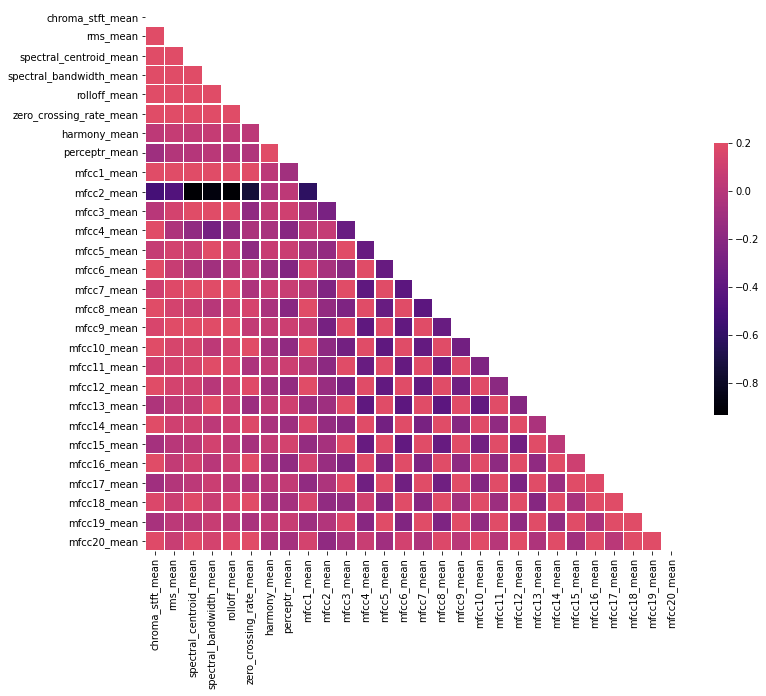

In [9]:
mean_cols = [col for col in df.columns if 'mean' in col]
corr = df[mean_cols].corr()

mask = np.triu(np.ones_like(corr,  dtype = bool))
plt.figure(figsize = (12, 10))
print("mean_cols size:", len(mean_cols))
sns.heatmap(data = corr, mask = mask, vmax =.2, cmap = 'magma', linewidths = .5, center = 0, cbar_kws={"shrink": .5})
plt.show()

## MinMaxScaling

In [11]:
X = df.drop(['label'],axis = 1)
X = X.iloc[0:, 2:]
y = df['label']
transformer = preprocessing.MinMaxScaler()
x_trans = transformer.fit_transform(X)
X = pd.DataFrame(x_trans, columns = X.columns)

In [12]:
X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [13]:
# reduce the dimasion of our dataset to 2 for scatter plot using Principal Component Analysis
PCA_model = PCA(n_components=2)
df_min = PCA_model.fit_transform(X)
df_min = pd.DataFrame(df_min, columns = ['pca_col1', 'pca_col2'])
df_min = pd.concat([df_min, y], axis = 1)

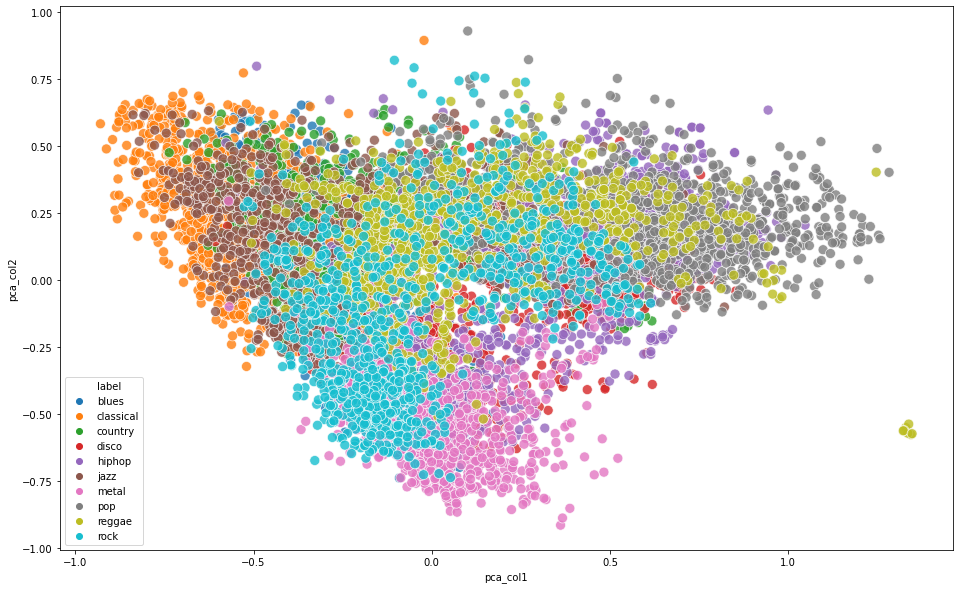

In [14]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = df_min['pca_col1'], y = df_min['pca_col2'], data = df_min, hue = 'label', s = 100, alpha = 0.8)

## Modeling 

In [16]:
# Encode label (y) with LabelEncoder and scalle data feature using MinMaxScaler
df['label'] = preprocessing.LabelEncoder().fit_transform(df['label'])
X = df.drop(['label', 'length', 'filename'], axis = 1)
scaller = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaller.fit_transform(X), columns = X.columns)
y = df['label']

In [17]:
# split data in train en test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# model fit function
def fit_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"train_accuracy and val_accuracy for {model.__str__()} \n")
    print(model.score(x_train, y_train))
    print(accuracy_score(y_test, y_pred))
    print("-------------------------------- ","\n")

In [19]:
# list of estimators
models = [KNeighborsClassifier(n_neighbors=5),
          LogisticRegression(max_iter=1000),
          RandomForestClassifier(n_estimators=1000),
          DecisionTreeClassifier(),
          SVC() ]

In [20]:
# fit all model in our list estimators
for model in models:
    fit_model(model)

train_accuracy and val_accuracy for KNeighborsClassifier() 

0.9471971971971972
0.9049049049049049
--------------------------------  

train_accuracy and val_accuracy for LogisticRegression(max_iter=1000) 

0.7040790790790791
0.6796796796796797
--------------------------------  

train_accuracy and val_accuracy for RandomForestClassifier(n_estimators=1000) 

0.9992492492492493
0.8838838838838838
--------------------------------  

train_accuracy and val_accuracy for DecisionTreeClassifier() 

0.9992492492492493
0.6381381381381381
--------------------------------  

train_accuracy and val_accuracy for SVC() 

0.7795295295295295
0.7397397397397397
--------------------------------  



In [ ]:
# GriSeachCV for knn model
knn_grid_params = {'n_neighbors': np.arange(3, 50, 2),
                'metric':['euclidean', 'manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_grid_params)
knn_grid.fit(x_train, y_train)
best_knn_model = knn_grid.best_estimator_
print(knn_grid.best_params_)
print("accuracy", knn_grid.best_score_)
print("val_accuracy", accuracy_score(y_test, best_knn_model.predict(x_test)))
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, best_knn_model.predict(x_test))
plt.figure(figsize = (12,8))
print("confusion matrix")
sns.heatmap(conf_matrix, annot=True)

##  function to get the distance between feature vecotrs and find neighbors

In [2]:
def getNeighbors(trainingSet, instance, k):
    distances = []
    for x in range (len(trainingSet)):
        dist = distance(trainingSet[x], instance, k) + distance(instance, trainingSet[x], k) 
        distances.append((trainingSet[x][2], dist))

    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    
    return neighbors

## identify the class of the instance

In [3]:
def nearestClass(neighbors):
    classVote = {}

    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1

    sorter = sorted(classVote.items(), key = operator.itemgetter(1), reverse=True)

    return sorter[0][0]

## function to evaluate the model

In [4]:
def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    
    return (1.0 * correct) / len(testSet)
